# Import Nessesory Libries

In [39]:
# import all the nessecery libries for machine learning project
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Sets

In [2]:
# Import data set
outlet_data=pd.read_csv('Data Storn - Semi final data sets/outlets_data.csv')
freezer_data=pd.read_csv('Data Storn - Semi final data sets/freezer_data.csv')
product_data=pd.read_csv('Data Storn - Semi final data sets/product_data.csv')
sales_data=pd.read_csv('Data Storn - Semi final data sets/sales_data.csv')
week_data=pd.read_csv('Data Storn - Semi final data sets/week_data.csv')



In [3]:
outlet_data

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
983,ID4119,3858
984,ID2978,3495
985,ID6549,1141
986,ID1210,3322


In [4]:
# create a data frame for each outlate and product
outlet_data = outlet_data.groupby(['Outlet_ID'])['area(sqft)'].mean().reset_index()

In [5]:
outlet_data

,Outlet_ID,area(sqft)
0,ID1008,3387.0
1,ID1012,1931.0
2,ID1024,3127.0
3,ID1029,5294.0
4,ID1036,2584.0
...,...,...
946,ID9960,4690.0
947,ID9971,3960.0
948,ID9973,4038.0
949,ID9979,4456.0


In [6]:
# Check for duplicates in column 'A'
duplicates = outlet_data[outlet_data.duplicated(['Outlet_ID'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Outlet_ID, area(sqft)]
Index: []


In [7]:
# get count of null values in each column
null_counts = outlet_data.isnull().sum()
# print the counts
print(null_counts)

Outlet_ID     0
area(sqft)    0
dtype: int64


In [8]:
product_data

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [9]:
sales_data

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0
...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0


In [10]:
# get count of null values in each column
null_counts = sales_data.isnull().sum()
# print the counts
print(null_counts)

Outlet_ID       0
week            0
pid             0
product_name    0
no_units        0
dtype: int64


In [11]:
week_data

,Week,Start Date,End Date
0,Week 1,1/2/2023,1/8/2023
1,Week 2,1/9/2023,1/15/2023
2,Week 3,1/16/2023,1/22/2023
3,Week 4,1/23/2023,1/29/2023
4,Week 5,1/30/2023,2/5/2023
5,Week 6,2/6/2023,2/12/2023
6,Week 7,2/13/2023,2/19/2023
7,Week 8,2/20/2023,2/26/2023
8,Week 9,2/27/2023,3/5/2023
9,Week 10,3/6/2023,3/12/2023


In [12]:
# get count of null values in each column
null_counts = week_data.isnull().sum()
# print the counts
print(null_counts)

Week          0
Start Date    0
End Date      0
dtype: int64


# Creating Dtaframes

#### create a data frame for each outlate and product

In [13]:
# create a data frame for each outlate and product
sales_grouped_outlats = sales_data.groupby(['Outlet_ID', 'pid'])['no_units'].sum().reset_index()


In [14]:
sales_grouped_outlats

,Outlet_ID,pid,no_units
0,ID1008,IP1,6970.0
1,ID1008,IP2,7206.0
2,ID1008,IP3,6285.0
3,ID1008,IP4,6486.0
4,ID1008,IP5,6055.0
...,...,...,...
7185,ID9980,IP1,6212.0
7186,ID9980,IP2,7888.0
7187,ID9980,IP3,4999.0
7188,ID9980,IP4,9370.0


In [15]:
# pivot the dataframe to make item_description values as columns
pivoted_df_sales = sales_grouped_outlats.pivot(index='Outlet_ID', columns='pid', values='no_units')

# fill NaN values with 0
pivoted_df_sales.fillna(0, inplace=True)

# resetting the index
pivoted_df_sales = pivoted_df_sales.reset_index()

In [16]:
pivoted_df_sales

pid,Outlet_ID,BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5
0,ID1008,0.0,0.0,0.0,0.0,0.0,6970.0,7206.0,6285.0,6486.0,6055.0
1,ID1012,636.0,713.0,795.0,572.0,559.0,0.0,0.0,0.0,0.0,0.0
2,ID1024,1703.0,1251.0,1150.0,1388.0,1451.0,0.0,0.0,0.0,0.0,0.0
3,ID1029,1659.0,2190.0,1891.0,1513.0,1109.0,9166.0,7577.0,9158.0,7961.0,6918.0
4,ID1036,567.0,583.0,725.0,564.0,722.0,4934.0,5708.0,6200.0,5526.0,5835.0
...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,1815.0,1878.0,1359.0,1958.0,2257.0,7142.0,6123.0,8809.0,5699.0,11328.0
947,ID9971,0.0,0.0,0.0,0.0,0.0,6390.0,6784.0,7786.0,9162.0,6361.0
948,ID9973,1411.0,1970.0,2001.0,1317.0,1870.0,7341.0,6473.0,8091.0,9850.0,7744.0
949,ID9979,0.0,0.0,0.0,0.0,0.0,5596.0,7372.0,6283.0,5740.0,6901.0


In [17]:
# add columns for each product to the outlet data frame

sales_grouped_outlats=(pd.merge(outlet_data, pivoted_df_sales, on='Outlet_ID', how='left'))

In [18]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5
0,ID1008,3387.0,0.0,0.0,0.0,0.0,0.0,6970.0,7206.0,6285.0,6486.0,6055.0
1,ID1012,1931.0,636.0,713.0,795.0,572.0,559.0,0.0,0.0,0.0,0.0,0.0
2,ID1024,3127.0,1703.0,1251.0,1150.0,1388.0,1451.0,0.0,0.0,0.0,0.0,0.0
3,ID1029,5294.0,1659.0,2190.0,1891.0,1513.0,1109.0,9166.0,7577.0,9158.0,7961.0,6918.0
4,ID1036,2584.0,567.0,583.0,725.0,564.0,722.0,4934.0,5708.0,6200.0,5526.0,5835.0
...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,4690.0,1815.0,1878.0,1359.0,1958.0,2257.0,7142.0,6123.0,8809.0,5699.0,11328.0
947,ID9971,3960.0,0.0,0.0,0.0,0.0,0.0,6390.0,6784.0,7786.0,9162.0,6361.0
948,ID9973,4038.0,1411.0,1970.0,2001.0,1317.0,1870.0,7341.0,6473.0,8091.0,9850.0,7744.0
949,ID9979,4456.0,0.0,0.0,0.0,0.0,0.0,5596.0,7372.0,6283.0,5740.0,6901.0


#### creating fetures for total item solds for bulk and impuls item

In [19]:
sales_grouped_outlats['tot_bulk_itm'] = sales_grouped_outlats[['BP1', 'BP2', 'BP3', 'BP4', 'BP5']].sum(axis=1)
sales_grouped_outlats['tot_impulse_itm'] = sales_grouped_outlats[['IP1', 'IP2', 'IP3', 'IP4', 'IP5']].sum(axis=1)

In [20]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm
0,ID1008,3387.0,0.0,0.0,0.0,0.0,0.0,6970.0,7206.0,6285.0,6486.0,6055.0,0.0,33002.0
1,ID1012,1931.0,636.0,713.0,795.0,572.0,559.0,0.0,0.0,0.0,0.0,0.0,3275.0,0.0
2,ID1024,3127.0,1703.0,1251.0,1150.0,1388.0,1451.0,0.0,0.0,0.0,0.0,0.0,6943.0,0.0
3,ID1029,5294.0,1659.0,2190.0,1891.0,1513.0,1109.0,9166.0,7577.0,9158.0,7961.0,6918.0,8362.0,40780.0
4,ID1036,2584.0,567.0,583.0,725.0,564.0,722.0,4934.0,5708.0,6200.0,5526.0,5835.0,3161.0,28203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,4690.0,1815.0,1878.0,1359.0,1958.0,2257.0,7142.0,6123.0,8809.0,5699.0,11328.0,9267.0,39101.0
947,ID9971,3960.0,0.0,0.0,0.0,0.0,0.0,6390.0,6784.0,7786.0,9162.0,6361.0,0.0,36483.0
948,ID9973,4038.0,1411.0,1970.0,2001.0,1317.0,1870.0,7341.0,6473.0,8091.0,9850.0,7744.0,8569.0,39499.0
949,ID9979,4456.0,0.0,0.0,0.0,0.0,0.0,5596.0,7372.0,6283.0,5740.0,6901.0,0.0,31892.0


#### Creatng feature for Total Icecream Volume sold

In [21]:
sales_grouped_outlats['tot_icecream_vol']=(sales_grouped_outlats['tot_bulk_itm']*1.0)+(sales_grouped_outlats['tot_impulse_itm']*0.2)

In [22]:
sales_grouped_outlats[['area(sqft)','BP1', 'BP2', 'BP3', 'BP4', 'BP5','IP1', 'IP2', 'IP3', 'IP4', 'IP5','tot_bulk_itm','tot_impulse_itm']] = sales_grouped_outlats[['area(sqft)','BP1', 'BP2', 'BP3', 'BP4', 'BP5','IP1', 'IP2', 'IP3', 'IP4', 'IP5','tot_bulk_itm','tot_impulse_itm']].astype(int)

In [23]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol
0,ID1008,3387,0,0,0,0,0,6970,7206,6285,6486,6055,0,33002,6600.4
1,ID1012,1931,636,713,795,572,559,0,0,0,0,0,3275,0,3275.0
2,ID1024,3127,1703,1251,1150,1388,1451,0,0,0,0,0,6943,0,6943.0
3,ID1029,5294,1659,2190,1891,1513,1109,9166,7577,9158,7961,6918,8362,40780,16518.0
4,ID1036,2584,567,583,725,564,722,4934,5708,6200,5526,5835,3161,28203,8801.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,4690,1815,1878,1359,1958,2257,7142,6123,8809,5699,11328,9267,39101,17087.2
947,ID9971,3960,0,0,0,0,0,6390,6784,7786,9162,6361,0,36483,7296.6
948,ID9973,4038,1411,1970,2001,1317,1870,7341,6473,8091,9850,7744,8569,39499,16468.8
949,ID9979,4456,0,0,0,0,0,5596,7372,6283,5740,6901,0,31892,6378.4


#### Create a feature for total revenew

In [24]:
product_data

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [25]:
sales_grouped_outlats['tot_revnew']=((sales_grouped_outlats['BP1']*1200)+(sales_grouped_outlats['BP2']*1100)+(sales_grouped_outlats['BP3']*1150)+(sales_grouped_outlats['BP4']*1000)+(sales_grouped_outlats['BP5']*1100)+(sales_grouped_outlats['IP1']*100)+(sales_grouped_outlats['IP2']*90)+(sales_grouped_outlats['IP3']*110)+(sales_grouped_outlats['IP4']*100)+(sales_grouped_outlats['IP5']*100)).astype(float)

In [26]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew
0,ID1008,3387,0,0,0,0,0,6970,7206,6285,6486,6055,0,33002,6600.4,3290990.0
1,ID1012,1931,636,713,795,572,559,0,0,0,0,0,3275,0,3275.0,3648650.0
2,ID1024,3127,1703,1251,1150,1388,1451,0,0,0,0,0,6943,0,6943.0,7726300.0
3,ID1029,5294,1659,2190,1891,1513,1109,9166,7577,9158,7961,6918,8362,40780,16518.0,13401160.0
4,ID1036,2584,567,583,725,564,722,4934,5708,6200,5526,5835,3161,28203,8801.6,6338870.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,4690,1815,1878,1359,1958,2257,7142,6123,8809,5699,11328,9267,39101,17087.2,14184310.0
947,ID9971,3960,0,0,0,0,0,6390,6784,7786,9162,6361,0,36483,7296.6,3658320.0
948,ID9973,4038,1411,1970,2001,1317,1870,7341,6473,8091,9850,7744,8569,39499,16468.8,13501430.0
949,ID9979,4456,0,0,0,0,0,5596,7372,6283,5740,6901,0,31892,6378.4,3178310.0


### Encode

In [27]:
sales_grouped_outlats['Outlet_ID'] = sales_grouped_outlats['Outlet_ID'].str.replace(r'^ID', '').astype(int)

C:\Users\gw\AppData\Local\Temp\ipykernel_12236\777021382.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sales_grouped_outlats['Outlet_ID'] = sales_grouped_outlats['Outlet_ID'].str.replace(r'^ID', '').astype(int)


In [28]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew
0,1008,3387,0,0,0,0,0,6970,7206,6285,6486,6055,0,33002,6600.4,3290990.0
1,1012,1931,636,713,795,572,559,0,0,0,0,0,3275,0,3275.0,3648650.0
2,1024,3127,1703,1251,1150,1388,1451,0,0,0,0,0,6943,0,6943.0,7726300.0
3,1029,5294,1659,2190,1891,1513,1109,9166,7577,9158,7961,6918,8362,40780,16518.0,13401160.0
4,1036,2584,567,583,725,564,722,4934,5708,6200,5526,5835,3161,28203,8801.6,6338870.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,9960,4690,1815,1878,1359,1958,2257,7142,6123,8809,5699,11328,9267,39101,17087.2,14184310.0
947,9971,3960,0,0,0,0,0,6390,6784,7786,9162,6361,0,36483,7296.6,3658320.0
948,9973,4038,1411,1970,2001,1317,1870,7341,6473,8091,9850,7744,8569,39499,16468.8,13501430.0
949,9979,4456,0,0,0,0,0,5596,7372,6283,5740,6901,0,31892,6378.4,3178310.0


In [29]:
sales_grouped_outlats.describe()

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,9.510000e+02
mean,5501.460568,4276.504732,968.014721,969.825447,956.701367,950.032597,959.386961,5381.567823,5419.470032,5448.229232,5352.255521,5376.458465,4803.961094,26977.981073,10199.557308,8.032076e+06
std,2546.490239,2406.921953,784.834718,788.377711,767.371816,762.534776,775.613880,3722.312754,3776.447345,3805.871755,3694.841995,3758.842610,3778.148516,18044.040247,5937.379281,5.027783e+06
min,1008.000000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2601.000000,1.637760e+06
25%,3381.000000,2400.000000,405.500000,457.000000,432.000000,443.000000,434.000000,3031.500000,3004.500000,2964.000000,3111.500000,2742.500000,2753.000000,18677.000000,6518.400000,3.636650e+06
50%,5561.000000,3958.000000,703.000000,710.000000,714.000000,725.000000,705.000000,5743.000000,5751.000000,5861.000000,5818.000000,5708.000000,3318.000000,29060.000000,7731.200000,6.241750e+06
75%,7573.500000,5776.000000,1617.500000,1589.500000,1611.000000,1589.000000,1570.000000,8150.500000,8040.000000,8072.000000,7957.500000,7975.500000,8362.000000,40720.500000,16688.000000,1.350073e+07
max,9980.000000,9950.000000,4328.000000,4843.000000,4765.000000,4561.000000,5161.000000,17528.000000,19887.000000,20067.000000,20386.000000,18517.000000,23658.000000,85680.000000,40760.000000,3.477513e+07


In [30]:
# Print list of features
print(sales_grouped_outlats.columns.tolist())

['Outlet_ID', 'area(sqft)', 'BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'IP1', 'IP2', 'IP3', 'IP4', 'IP5', 'tot_bulk_itm', 'tot_impulse_itm', 'tot_icecream_vol', 'tot_revnew']


# model to remove duploicate Outlet_ID

In [31]:
# Group the DataFrame by column 'Outlet_ID' and get the groups with duplicates
groups = sales_grouped_outlats[['Outlet_ID','area(sqft)','tot_revnew']].groupby(['Outlet_ID']).filter(lambda x: len(x) > 1)

df_of_duplicates=pd.DataFrame()

# Iterate over the groups and print the duplicate rows
for name, group in groups.groupby(['Outlet_ID']):
    df_of_duplicates=df_of_duplicates.append(group)

C:\Users\gw\AppData\Local\Temp\ipykernel_12236\4174369189.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups.groupby(['Outlet_ID']):


In [32]:
df_of_duplicates

""


# Visualization

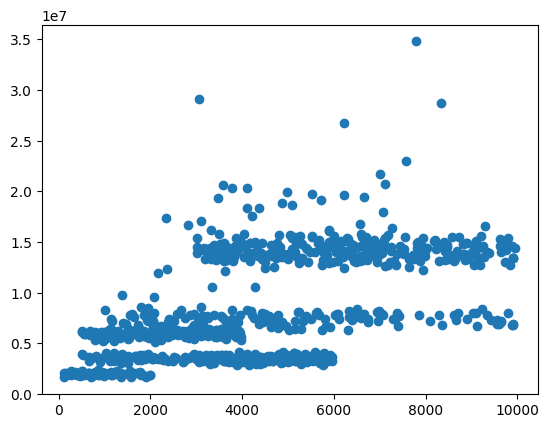

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


x = sales_grouped_outlats['area(sqft)']
y = sales_grouped_outlats['tot_revnew']

plt.scatter(x, y)

plt.show()

##### Corelation matrix

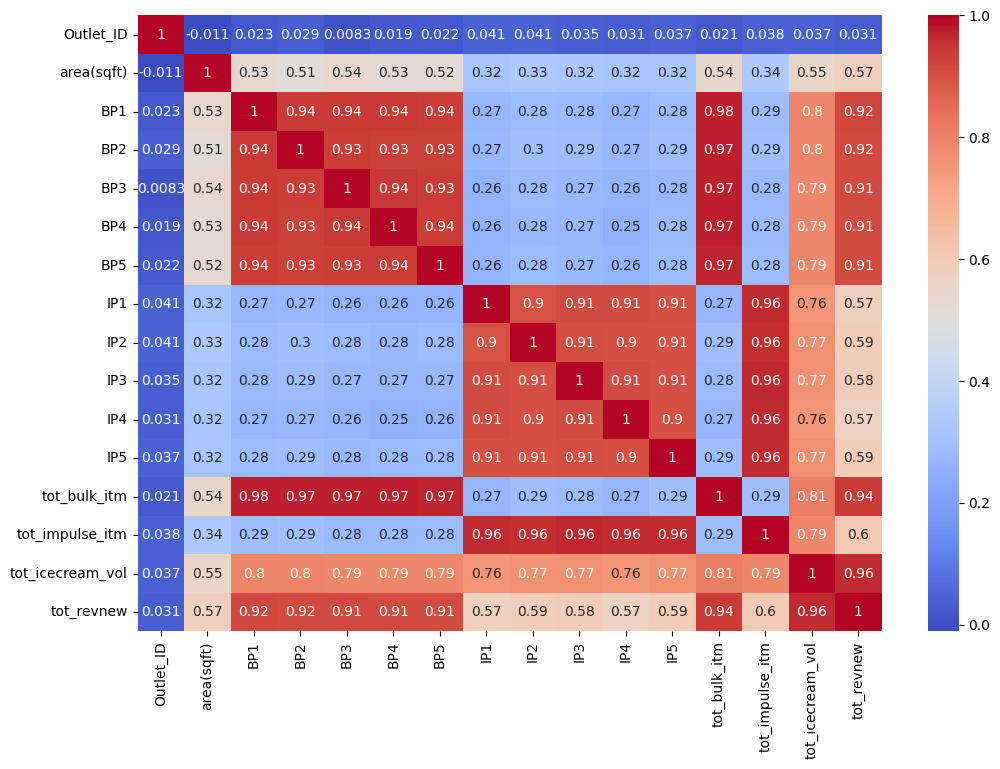

In [40]:
# Create correlation matrix
corr = sales_grouped_outlats.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

# Training the Model

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data from csv file into pandas DataFrame
data = sales_grouped_outlats

features = ['area(sqft)', 'BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'IP1', 'IP2', 'IP3', 'IP4', 'IP5', 'tot_bulk_itm', 'tot_impulse_itm', 'tot_icecream_vol', 'tot_revnew']


n_clusters=10
iterations=500

# Select features for k-means clustering
X = data[features]

# Initialize and fit k-means clustering model
kmeans = KMeans(n_clusters=10,init='k-means++', n_init=2000, max_iter=500,tol=0.000001 ) # set number of clusters
kmeans.fit(X)

# Get predicted cluster labels and centroids
labels = kmeans.predict(X)




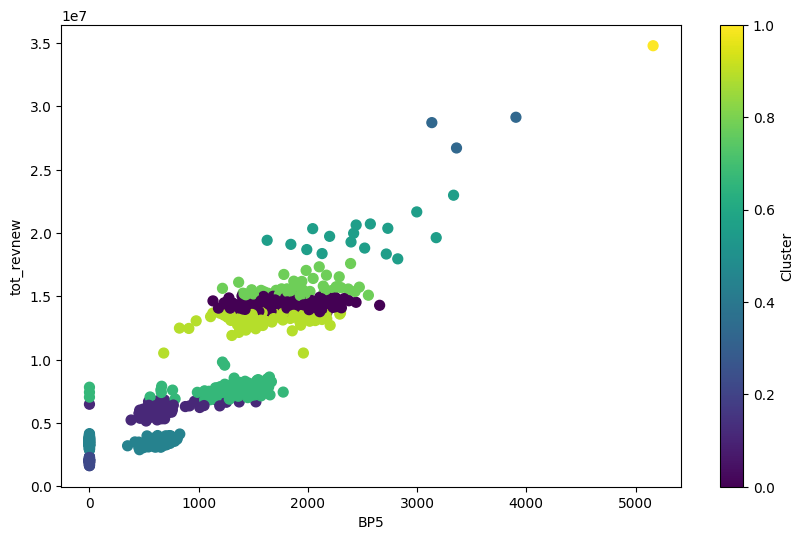

In [46]:
# Create scatter plot with feature_1 on x-axis and feature_2 on y-axis

featur_1 = 'BP5'
featur_2 = 'tot_revnew'

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data[featur_1], data[featur_2], c=labels, s=50, cmap='viridis')

# Add legend with cluster labels
scatter = ax.scatter([],[], c=[], cmap='viridis')
plt.colorbar(scatter, label='Cluster')

# Set x and y axis labels
ax.set_xlabel(featur_1)
ax.set_ylabel(featur_2)

# Show plot
plt.show()

In [50]:
# Create a DataFrame from the array of cluster lables
clusters_df = pd.DataFrame(labels, columns=['Clusters'])

In [52]:
clusters_df

,Clusters
0,4
1,4
2,6
3,8
4,1
...,...
946,0
947,4
948,8
949,4


In [54]:
outlats_with_clusters = pd.concat([sales_grouped_outlats, clusters_df], axis=1)

In [55]:
outlats_with_clusters

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,Clusters
0,1008,3387,0,0,0,0,0,6970,7206,6285,6486,6055,0,33002,6600.4,3290990.0,4
1,1012,1931,636,713,795,572,559,0,0,0,0,0,3275,0,3275.0,3648650.0,4
2,1024,3127,1703,1251,1150,1388,1451,0,0,0,0,0,6943,0,6943.0,7726300.0,6
3,1029,5294,1659,2190,1891,1513,1109,9166,7577,9158,7961,6918,8362,40780,16518.0,13401160.0,8
4,1036,2584,567,583,725,564,722,4934,5708,6200,5526,5835,3161,28203,8801.6,6338870.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,9960,4690,1815,1878,1359,1958,2257,7142,6123,8809,5699,11328,9267,39101,17087.2,14184310.0,0
947,9971,3960,0,0,0,0,0,6390,6784,7786,9162,6361,0,36483,7296.6,3658320.0,4
948,9973,4038,1411,1970,2001,1317,1870,7341,6473,8091,9850,7744,8569,39499,16468.8,13501430.0,8
949,9979,4456,0,0,0,0,0,5596,7372,6283,5740,6901,0,31892,6378.4,3178310.0,4


In [56]:
df_for_optimization=outlats_with_clusters[['Outlet_ID','area(sqft)','tot_revnew','tot_icecream_vol','Clusters']]

In [57]:
df_for_optimization

,Outlet_ID,area(sqft),tot_revnew,tot_icecream_vol,Clusters
0,1008,3387,3290990.0,6600.4,4
1,1012,1931,3648650.0,3275.0,4
2,1024,3127,7726300.0,6943.0,6
3,1029,5294,13401160.0,16518.0,8
4,1036,2584,6338870.0,8801.6,1
...,...,...,...,...,...
946,9960,4690,14184310.0,17087.2,0
947,9971,3960,3658320.0,7296.6,4
948,9973,4038,13501430.0,16468.8,8
949,9979,4456,3178310.0,6378.4,4
